<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Setup" data-toc-modified-id="Imports-and-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Setup</a></span></li><li><span><a href="#Keyword-Analysis-Functions" data-toc-modified-id="Keyword-Analysis-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Keyword Analysis Functions</a></span><ul class="toc-item"><li><span><a href="#Available-Data" data-toc-modified-id="Available-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Available Data</a></span></li><li><span><a href="#Load-Survey-Data" data-toc-modified-id="Load-Survey-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load Survey Data</a></span></li><li><span><a href="#Prepare-Survey-Data-(includes-clean_and_tokenize_texts)" data-toc-modified-id="Prepare-Survey-Data-(includes-clean_and_tokenize_texts)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Prepare Survey Data (includes clean_and_tokenize_texts)</a></span></li><li><span><a href="#Show-Model-Topics" data-toc-modified-id="Show-Model-Topics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Show Model Topics</a></span></li><li><span><a href="#Generate-Keywords" data-toc-modified-id="Generate-Keywords-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Generate Keywords</a></span></li><li><span><a href="#Translate-Output" data-toc-modified-id="Translate-Output-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Translate Output</a></span></li><li><span><a href="#Order-by-Part-of-Speech" data-toc-modified-id="Order-by-Part-of-Speech-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Order by Part of Speech</a></span></li><li><span><a href="#Get-Survey-Specific-Keywords" data-toc-modified-id="Get-Survey-Specific-Keywords-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Get Survey Specific Keywords</a></span></li></ul></li><li><span><a href="#Visualization-Functions" data-toc-modified-id="Visualization-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization Functions</a></span><ul class="toc-item"><li><span><a href="#Graph-of-Topic-Number-Evaluations" data-toc-modified-id="Graph-of-Topic-Number-Evaluations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Graph of Topic Number Evaluations</a></span></li><li><span><a href="#pyLDAvis-Topic-Visualization" data-toc-modified-id="pyLDAvis-Topic-Visualization-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>pyLDAvis Topic Visualization</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Word Cloud</a></span></li></ul></li><li><span><a href="#gen_analysis_files-Test" data-toc-modified-id="gen_analysis_files-Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>gen_analysis_files Test</a></span></li></ul></div>

# Imports and Setup

In [1]:
import os
import sys

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# Plot settings
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

pd.set_option("display.max_rows", 16) # maximum df rows
pd.set_option('display.max_columns', None) # maximum df columns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>")) # widens interface
# %matplotlib notebook

In [2]:
data_path = os.getcwd() + '/survey_data'

import steady_survey

In [3]:
# steady_survey.update_dependencies()

In [4]:
def head_shape(df, length=5):
    """Displays the head of a df and gives its shape"""
    base_length = pd.get_option("display.max_rows")
    pd.set_option("display.max_rows", length)
    
    from IPython.display import display
    display(df.head(length))
    display(df.shape)

    pd.set_option("display.max_rows", base_length)

# Keyword Analysis Functions

## Available Data

In [5]:
from os import listdir
from os.path import isfile, join
data_files = [f for f in listdir(data_path) if isfile(join(data_path, f)) and f != '.DS_Store']
data_files

['the_quietus.xlsx',
 'polyester.xlsx',
 'was_mit_medien.xlsx',
 'damien_van_achter.xlsx',
 'mit_vergnuegen.xlsx',
 'accentricity.xlsx',
 'payment_banking.xlsx',
 'telex.xlsx',
 'blackrock.xlsx',
 'anorak.xlsx',
 'french_survey.xlsx']

In [6]:
accentricity_path_lang = [data_path + '/accentricity.xlsx', 'english']
anorak_path_lang = [data_path + '/anorak.xlsx', 'english']
blackrock_path_lang = [data_path + '/blackrock.xlsx', 'german']
damien_van_achter_path_lang = [data_path + '/damien_van_achter.xlsx', 'french']
mit_vergnuegen_path_lang = [data_path + '/mit_vergnuegen.xlsx', 'german']
payment_banking_path_lang = [data_path + '/payment_banking.xlsx', 'german']
polyester_path_lang = [data_path + '/polyester.xlsx', 'english']
quietus_path_lang = [data_path + '/the_quietus.xlsx', 'english']
french_survey_path_lang = [data_path + '/french_survey.xlsx', 'french']
telex_path_lang = [data_path + '/telex.xlsx', 'hungarian']
was_mit_medien_path_lang = [data_path + '/was_mit_medien.xlsx', 'german']

## Load Survey Data

In [7]:
survey_data_path = mit_vergnuegen_path_lang[0]
input_language = mit_vergnuegen_path_lang[1]
output_language = mit_vergnuegen_path_lang[1]

In [8]:
df_survey = steady_survey.load_survey_data(data=survey_data_path)
head_shape(df=df_survey, length=5)

,user_id,val_benefit,unval_benefit,val_personal,unval_personal,most_important,mission_description,higher_purpose,expensive_ok,expensive_not_ok,bargain_ok,bargain_not_ok,likelihood_expensive,likelihood_bargain,contact_duraction,start_time,submit_time,network_id,extra_col_0,extra_col_1,extra_col_2,extra_col_3,extra_col_4
0,0,Ich bekomme einen Blick hinter die Kulissen,Ich bekomme Zugang hinter eine Paywall,Ich knüpfe neue Kontakte,Ich kann besser Entscheidungen fällen,Freude,Der Freund in der Großstadt,Das Leben ein bisschen besser zu machen,7,19,3,3,4.0,4.0,NaN,25/09/2020 11:21:29,25/09/2020 11:21:29,c46b2p2o2vs97c46byhsg6nu362wk1wx,Matze,"Ja, ich würde monatlich etwas zahlen",False,NaN,NaN
1,1,Ich bekomme Zugang hinter eine Paywall,Mein Name wird als Mitglied eingeblendet,"Ich will, das ihr auch in Zukunft existiert",Ich habe weniger Sorgen,NaN,NaN,NaN,7,10,4,1,3.0,3.0,3 Jahre oder länger,2020-10-10 16:05:16,2020-10-10 16:05:16,sbcq5uk1bx6ttzdrisbcq5u3shj7btqk,Katharina,"Ja, ich würde bei einer Kampagne helfen",False,NaN,München
2,2,Ich kann eine Veranstaltung besuchen,Ich bekomme Zugang hinter eine Paywall,Ich lerne etwas Neues,Ich habe weniger Sorgen,NaN,NaN,NaN,5,1,1,1,1.0,3.0,2 Jahre,2020-10-10 16:13:23,2020-10-10 16:13:23,gvhprsvr9u2sq41isgvhprsvftskv62z,Stefan,Eher nicht,False,NaN,München
3,3,Ich bekomme Zugang hinter eine Paywall,Mein Name wird als Mitglied eingeblendet,Ich habe weniger Langweile,Ich habe weniger Langweile,NaN,NaN,Gleichberechtigung,19,23,8,3,3.0,2.0,1 Jahr,2020-10-10 16:20:27,2020-10-10 16:20:27,tj0kkhmjslklpj3qtj0ks8iltfjyypak,Isabella,"Ja, ich würde die Idee teilen",False,NaN,München
4,4,Ich kann eine Veranstaltung besuchen,Mein Name wird als Mitglied eingeblendet,Ich knüpfe neue Kontakte,Ich fühle mich allgemein besser,"Kontakte, Events",NaN,Vergnügen,10,11,2,1,1.0,5.0,3 Jahre oder länger,2020-10-10 16:21:26,2020-10-10 16:21:26,hcr9faac3cg97lov9phcr9faamujuk6x,Luisa,Eher nicht,False,NaN,München


(905, 23)

## Prepare Survey Data (includes clean_and_tokenize_texts)

In [9]:
index = 0
print(df_survey.loc[index, 'most_important'])
print(df_survey.loc[index, 'mission_description'])
print(df_survey.loc[index, 'higher_purpose'])

text_corpus = steady_survey.prepare_survey_data(data=survey_data_path, 
                                                input_language=input_language, 
                                                incl_mc_questions=False,
                                                min_freq=2,
                                                min_word_len=4)[0]

Freude
Der Freund in der Großstadt
Das Leben ein bisschen besser zu machen


In [10]:
text_corpus[index]

['freude', 'freund', 'großstadt', 'leben', 'bisschen']

## Show Model Topics

In [11]:
topics = steady_survey.gen_survey_keywords(method='LDA',
                                           text_corpus=survey_data_path,
                                           clean_texts=None,
                                           input_language=input_language,
                                           output_language=output_language,
                                           num_keywords=15,
                                           num_topics=10,
                                           corpuses_to_compare=None,
                                           return_topics=True, # <--
                                           incl_mc_questions=False,
                                           ignore_words=None,
                                           min_freq=2,
                                           min_word_len=4,
                                           sample_size=1)

In [12]:
topics[0]

['stadt',
 'spaß',
 'vergnügen',
 'leben',
 'unterstützen',
 'tipps',
 'entdecken',
 'weiß',
 'orte',
 'inspiration',
 'zeigen',
 'weiterhin',
 'ideen',
 'bekommen',
 'geben']

## Generate Keywords

In [23]:
ignore_words = None

In [24]:
freq_keywords = steady_survey.gen_survey_keywords(method='frequency',
                                                  text_corpus=survey_data_path,
                                                  clean_texts=None,
                                                  input_language=input_language,
                                                  output_language=output_language,
                                                  num_keywords=15,
                                                  num_topics=5,
                                                  corpuses_to_compare=None,
                                                  return_topics=False,
                                                  incl_mc_questions=False,
                                                  ignore_words=ignore_words,
                                                  min_freq=2,
                                                  min_word_len=4,
                                                  sample_size=1)

In [25]:
freq_keywords

['hogy',
 'függetl',
 'tájékoztatás',
 'hiteles',
 'szab',
 'sajtó',
 'legy',
 'újságírás',
 'fontos',
 'szeretne',
 'objektív',
 'index',
 'kell',
 'ember',
 'csak']

In [16]:
LDA_keywords = steady_survey.gen_survey_keywords(method='lda',
                                                 text_corpus=survey_data_path,
                                                 clean_texts=None,
                                                 input_language=input_language,
                                                 output_language=output_language,
                                                 num_keywords=15,
                                                 num_topics=12,
                                                 corpuses_to_compare=None,
                                                 return_topics=False,
                                                 incl_mc_questions=False,
                                                 ignore_words=ignore_words,
                                                 min_freq=2,
                                                 min_word_len=4,
                                                 sample_size=1)

In [17]:
LDA_keywords

['tipps',
 'vergnügen',
 'kultur',
 'stadt',
 'inspiration',
 'berlin',
 'unterstützen',
 'veranstaltungen',
 'informieren',
 'kennen',
 'bringen',
 'näher',
 'infos',
 'leben',
 'weiterhin']

In [18]:
output_0 = freq_keywords
output_1 = LDA_keywords

intersection = list(set(output_0) & set(output_1))
output_0_unique = list(set(output_0) - set(output_1))
output_1_unique = list(set(output_1) - set(output_0))

print("Words generated by each method:")
print(intersection)
print('')
print("Words generated only by method 0:")
print(output_0_unique)
print('')
print("Words generated only by method 1:")
print(output_1_unique)

Words generated by each method:
['leben', 'berlin', 'unterstützen', 'informieren', 'weiterhin', 'tipps', 'bringen', 'vergnügen', 'stadt', 'infos', 'kultur', 'veranstaltungen']

Words generated only by method 0:
['städte', 'geben', 'neues']

Words generated only by method 1:
['näher', 'inspiration', 'kennen']


## Translate Output

In [21]:
# This sometimes just doesn't work - try rerunning
steady_survey.translate_output(outputs=LDA_keywords, 
                               input_language=input_language, 
                               output_language='en') # switch to another language

['tips',
 'pleasure',
 'Culture',
 'city',
 'inspiration',
 'Berlin',
 'support',
 'events',
 'to inform',
 'know',
 'bring',
 'closer',
 'Info',
 'Life',
 'Farther']

## Order by Part of Speech

In [22]:
steady_survey._order_by_pos(outputs=LDA_keywords, 
                            output_language=output_language)

{'Nouns:': [vergnügen,
  kultur,
  stadt,
  inspiration,
  veranstaltungen,
  kennen,
  infos,
  leben,
  tipps,
  berlin],
 'Adjectives:': [näher],
 'Adverbs:': [weiterhin],
 'Verbs:': [unterstützen, informieren, bringen]}

## Get Survey Specific Keywords

In [23]:
# This generally produces the most frequent words in the survey or general LDA words
survey_specific_keywords = steady_survey.gen_survey_keywords(
                               method='tfidf',
                               text_corpus=mit_vergnuegen_path_lang[0],
                               clean_texts=None,
                               input_language=mit_vergnuegen_path_lang[1],
                               output_language=mit_vergnuegen_path_lang[1],
                               num_keywords=10,
                               num_topics=5,
                               corpuses_to_compare=[was_mit_medien_path_lang[0], # <-
                                                    payment_banking_path_lang[0],
                                                    blackrock_path_lang[0]],
                               return_topics=False,
                               incl_mc_questions=False,
                               ignore_words=ignore_words,
                               min_freq=2,
                               min_word_len=4,
                               sample_size=1)

In [24]:
survey_specific_keywords

['stadt',
 'tipps',
 'vergnügen',
 'veranstaltungen',
 'städte',
 'kultur',
 'berlin',
 'entdecken',
 'kennenlernen',
 'events']

# Visualization Functions

## Graph of Topic Number Evaluations

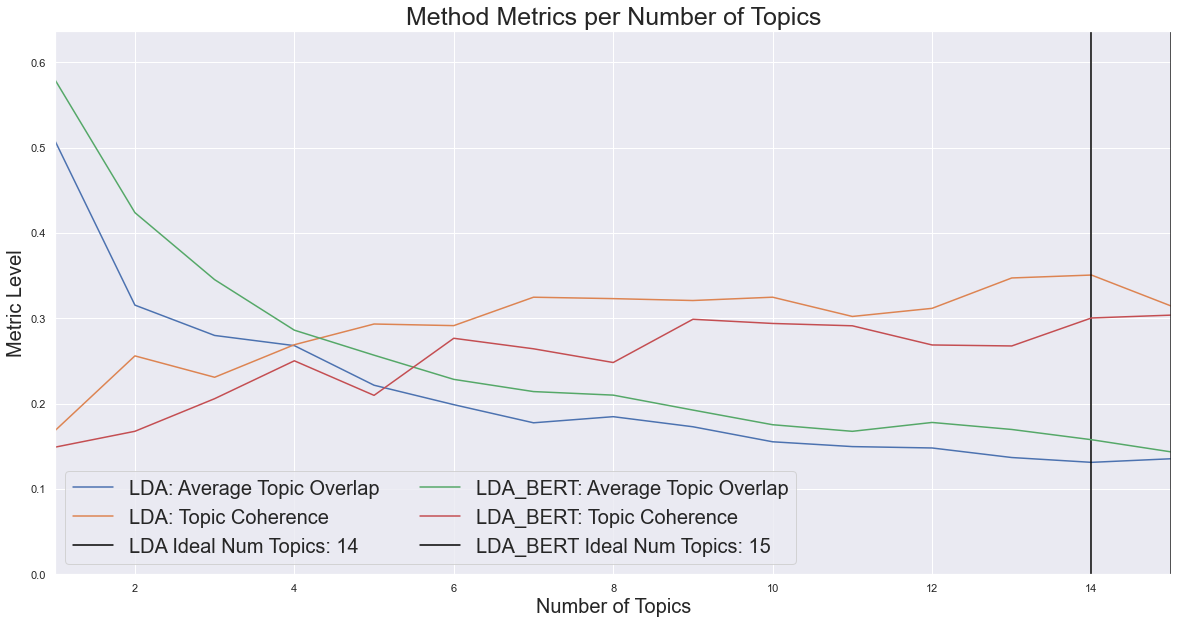

In [27]:
figure = steady_survey.graph_topic_num_evals(method=['lda', 'lda_bert'], # lda, bert, lda_bert
                                             text_corpus=survey_data_path, 
                                             clean_texts=None,
                                             input_language=input_language,
                                             num_keywords=15,
                                             topic_nums_to_compare=None,
                                             incl_mc_questions=False,
                                             min_freq=2,
                                             min_word_len=4,
                                             sample_size=1,
                                             metrics=True, # stability or coherence
                                             fig_size=(20,10),
                                             save_file=False,
                                             return_ideal_metrics=False) # <- used for gen_analysis_files

plt.show()

## pyLDAvis Topic Visualization

In [28]:
# Commented out, as it changes the output dimensions due to its width
# steady_survey.pyLDAvis_topics(method='lda',
#                               text_corpus=survey_data_path, 
#                               input_language=input_language,
#                               num_topics=10,
#                               incl_mc_questions=False,
#                               min_freq=2,
#                               min_word_len=4,
#                               save_file=False,
#                               display_ipython=True) # <- show in Jupyter notebook

## Word Cloud

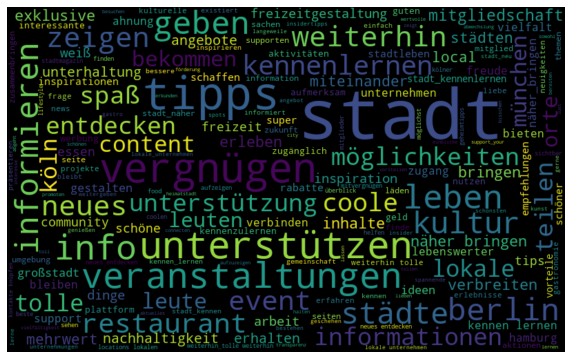

In [26]:
steady_survey.gen_word_cloud(text_corpus=survey_data_path,
                             input_language=input_language,
                             incl_mc_questions=False,
                             ignore_words=ignore_words,
                             min_freq=2,
                             min_word_len=4,
                             sample_size=1,
                             height=500,
                             save_file=False)

# gen_analysis_files Test

In [29]:
steady_survey.gen_analysis_files(method=['lda', 'bert', 'lda_bert'],
                                 text_corpus=survey_data_path, 
                                 clean_texts=None,
                                 input_language=input_language,
                                 output_language=output_language,
                                 num_keywords=15,
                                 topic_nums_to_compare=[10,11,12,13,14,15],
                                 corpuses_to_compare=None,
                                 incl_mc_questions=False,
                                 ignore_words=None,
                                 min_freq=2,
                                 min_word_len=4,
                                 sample_size=1,
                                 fig_size=(20,10),
                                 zip_results=True)

The most frequent keywords are:

['stadt', 'tipps', 'vergnügen', 'unterstützen', 'veranstaltungen', 'infos', 'weiterhin', 'leben', 'informieren', 'geben', 'neues', 'städte', 'kultur', 'bringen', 'berlin']

The LDA keywords are:

['unterstützen', 'mehrwert', 'unterhaltung', 'stadt', 'tipps', 'infos', 'informationen', 'tips', 'städte', 'informieren', 'vergnügen', 'neues', 'entdecken', 'geben', 'zeigen']

Are there words that should be removed [y/n]? y
Type or copy word(s) to be removed: vergnügen, geben, mehrwert, infos, tips


The new most frequent keywords are:

['stadt', 'tipps', 'unterstützen', 'veranstaltungen', 'weiterhin', 'leben', 'informieren', 'neues', 'städte', 'kultur', 'bringen', 'berlin', 'zeigen', 'entdecken', 'kennenlernen']

The new LDA keywords are:

['events', 'stadt', 'werbung', 'informieren', 'städte', 'berlin', 'leben', 'weiterhin', 'unterstützen', 'unterhaltung', 'neues', 'bringen', 'näher', 'tipps', 'veranstaltungen']

Are there words that should be removed [y/n]?